In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-video-2/Sample_vid_2.mp4
/kaggle/input/sample-video/Sample_video_1.mp4


In [2]:
import time
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL
from PIL.ImageDraw import Draw
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# Display image and videos
import cv2
import IPython
from IPython.display import Video, display
%matplotlib inline
from PIL import Image

In [4]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.8/613.8 kB 11.1 MB/s eta 0:00:00a 0:00:01


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

## Classes
names:
  0: person 
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

In [6]:
def show_properties(video_path):
    capture = cv2.VideoCapture(video_path)
    print("CV_CAP_PROP_FRAME_WIDTH: '{}'".format(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print("CV_CAP_PROP_FRAME_HEIGHT : '{}'".format(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print("CAP_PROP_FPS : '{}'".format(capture.get(cv2.CAP_PROP_FPS)))
    print("CAP_PROP_POS_MSEC : '{}'".format(capture.get(cv2.CAP_PROP_POS_MSEC)))
    print("CAP_PROP_FRAME_COUNT  : '{}'".format(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print("CAP_PROP_BRIGHTNESS : '{}'".format(capture.get(cv2.CAP_PROP_BRIGHTNESS)))
    print("CAP_PROP_CONTRAST : '{}'".format(capture.get(cv2.CAP_PROP_CONTRAST)))
    print("CAP_PROP_SATURATION : '{}'".format(capture.get(cv2.CAP_PROP_SATURATION)))
    print("CAP_PROP_HUE : '{}'".format(capture.get(cv2.CAP_PROP_HUE)))
    print("CAP_PROP_GAIN  : '{}'".format(capture.get(cv2.CAP_PROP_GAIN)))
    print("CAP_PROP_CONVERT_RGB : '{}'".format(capture.get(cv2.CAP_PROP_CONVERT_RGB)))

In [7]:
p1=(400,200)
p2=(600,200)
p3=(850,600)
p4=(500,700)

In [8]:
def make_parallelogram(frame,p1,p2,p3,p4,color=(255,0,0)):
    cv2.line(frame,p1,p2,color,5)
    cv2.line(frame,p2,p3,color,5)
    cv2.line(frame,p3,p4,color,5)
    cv2.line(frame,p4,p1,color,5)
    return frame

In [9]:
ROI=np.array([400,200,850,600])
scale_percent=50
rOI=(ROI*scale_percent/100).astype(int)

In [10]:
xmin,ymin,xmax,ymax=rOI

In [11]:
xmin,ymin,xmax,ymax

(200, 100, 425, 300)

(1080, 1920, 3)


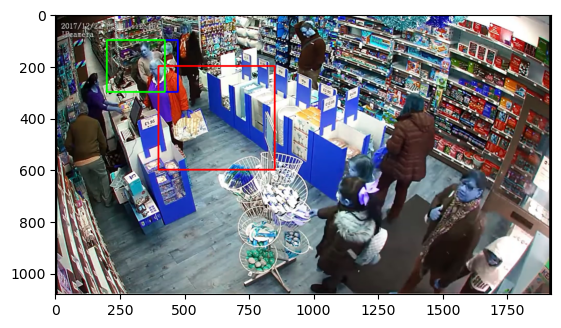

In [12]:
path="/kaggle/input/sample-video/Sample_video_1.mp4"
video=cv2.VideoCapture(path)
_,frame=video.read()
xmin,ymin,xmax,ymax=ROI
cv2.rectangle(frame,(200,100),(475,300),(0,0,255),5)
cv2.rectangle(frame,(xmin,ymin),(xmax,ymax),(255,0,0),5)
xmin,ymin,xmax,ymax=rOI
cv2.rectangle(frame,(xmin,ymin),(xmax,ymax),(0,255,0),5)
plt.imshow(frame)
print(frame.shape)
# plt.axis('off')

In [13]:
show_properties(path)

CV_CAP_PROP_FRAME_WIDTH: '1920.0'
CV_CAP_PROP_FRAME_HEIGHT : '1080.0'
CAP_PROP_FPS : '29.97002997002997'
CAP_PROP_POS_MSEC : '0.0'
CAP_PROP_FRAME_COUNT  : '2723.0'
CAP_PROP_BRIGHTNESS : '0.0'
CAP_PROP_CONTRAST : '0.0'
CAP_PROP_SATURATION : '0.0'
CAP_PROP_HUE : '0.0'
CAP_PROP_GAIN  : '0.0'
CAP_PROP_CONVERT_RGB : '1.0'


In [14]:
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))

In [15]:
height,width

(1080, 1920)

In [16]:
def plot_image_from_frame(frame_list):
    plt.figure()
    ct = 1
    for img in frame_list:
        plt.subplot(2, 3, ct)
        plt.imshow(img)
        plt.axis('off')
        ct += 1
    
    plt.show()  # Display all images together


In [17]:
frames_list=[]
for i in range(6):
    _,frame=video.read()
    frames_list.append(frame)

In [18]:
len(frames_list)

6

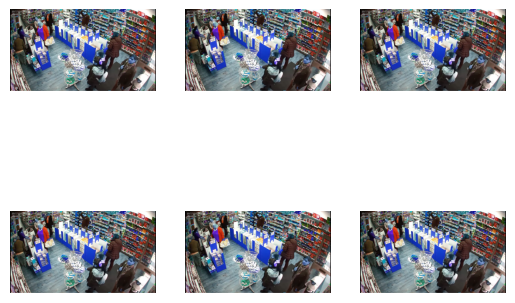

In [19]:
plot_image_from_frame(frames_list)

In [20]:
predictions=[]
for frame in frames_list:
    prediction_per_frame=model.predict(frame,classes=[0],device=0,verbose=False)
    predictions.append(prediction_per_frame)

In [21]:
def plot_model_result(predictions,idx=0):
    results=predictions[idx]
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        im.show()  # show image
        im.save('results.jpg')  # save image

In [22]:
plot_model_result(predictions,1)

In [23]:
predictions[0]

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
 

In [24]:
predictions[2][0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[1.2262e+03, 3.0300e+02, 1.4793e+03, 8.0401e+02, 8.9748e-01, 0.0000e+00],
        [1.3355e+03, 5.9021e+02, 1.6653e+03, 1.0654e+03, 7.5942e-01, 0.0000e+00],
        [3.5285e+02, 1.7144e+02, 5.2879e+02, 4.3836e+02, 7.2337e-01, 0.0000e+00],
        [9.2602e+02, 2.6739e+01, 1.0481e+03, 2.6605e+02, 6.1792e-01, 0.0000e+00],
        [9.5979e+01, 2.2629e+02, 2.6701e+02, 4.6402e+02, 5.4659e-01, 0.0000e+00],
        [1.0005e+03, 5.7379e+02, 1.2871e+03, 1.0654e+03, 5.2834e-01, 0.0000e+00],
        [4.7542e+02, 5.3757e+01, 5.7280e+02, 3.4702e+02, 4.1586e-01, 0.0000e+00],
        [2.9310e+02, 9.6488e+01, 3.7743e+02, 3.3815e+02, 4.0628e-01, 0.0000e+00],
        [3.9126e+01, 3.3770e+02, 2.3000e+02, 7.3587e+02, 3.6272e-01, 0.0000e+00],
        [3.0780e+02, 9.5270e+01, 3.8076e+02, 2.9953e+02, 2.7038e-01, 0.0000e+00],
        [3.5137e+02, 1.7133e+02, 4.6649e+02, 4.3007e+02, 2.5187e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0.

/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmp4t_9np2o.PNG'


In [25]:
predictions[3][0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[1.2264e+03, 3.0308e+02, 1.4790e+03, 8.0423e+02, 8.9861e-01, 0.0000e+00],
        [1.3360e+03, 5.9024e+02, 1.6652e+03, 1.0653e+03, 7.5518e-01, 0.0000e+00],
        [3.5290e+02, 1.7139e+02, 5.2882e+02, 4.3839e+02, 7.2473e-01, 0.0000e+00],
        [9.2596e+02, 2.6752e+01, 1.0481e+03, 2.6610e+02, 6.1984e-01, 0.0000e+00],
        [9.6028e+01, 2.2627e+02, 2.6722e+02, 4.6472e+02, 5.4353e-01, 0.0000e+00],
        [1.0009e+03, 5.6960e+02, 1.2870e+03, 1.0651e+03, 5.3257e-01, 0.0000e+00],
        [4.7552e+02, 5.3699e+01, 5.7270e+02, 3.4689e+02, 4.0833e-01, 0.0000e+00],
        [2.9279e+02, 9.5961e+01, 3.7771e+02, 3.3831e+02, 4.0257e-01, 0.0000e+00],
        [4.0109e+01, 3.3619e+02, 2.3048e+02, 7.3596e+02, 3.6548e-01, 0.0000e+00],
        [3.0762e+02, 9.4669e+01, 3.8095e+02, 2.9849e+02, 2.6725e-01, 0.0000e+00],
        [3.5151e+02, 1.7131e+02, 4.6625e+02, 4.2996e+02, 2.5254e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0.

In [47]:
class Detect():
  def __init__(self,path,model,roi):
    self.path=path
    self.model=model
    self.roi=roi
  def resize_frame(self,frame,scale_percent=100):
    """Function to resize an image in a percent scale"""
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    return resized
  def check_roi(self,point,roi):
        x, y = point
        x1, y1, x2, y2 = roi
        return x1 <= x <= x2 and y1 <= y <= y2
  def detect_people (self,verbose=False): # default set verbose as False

      ### Configurations
      dict_classes = self.model.model.names
      # Scaling percentage of original frame
      scale_percent = 50


      #-------------------------------------------------------
      # Reading video with cv2
      video = cv2.VideoCapture(path)

      # Objects to detect Yolo
      class_IDS = [0] # 0 denotes person in the coco dataset
    
      # Original informations of video
      height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
      width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
      fps = video.get(cv2.CAP_PROP_FPS)
      print('[INFO] - Original Dim: ', (width, height))
        
      # Auxiliary variables
      centers_old = {}
      centers_new = {}
      obj_id = 0 #denotes the id of the object
#       veiculos_contador_in = dict.fromkeys(class_IDS, 0)
#       veiculos_contador_out = dict.fromkeys(class_IDS, 0)
      frames_list = [] # stores the frames
      cy_linha = int(800 * scale_percent/100 )
      cx_sentido = int(width * scale_percent/100)
      in_roi=[]
      out_roi=[]
      print(f'[INFO] - Verbose during Prediction: {verbose}')


      

      # Scaling Video for better performance
      if scale_percent != 100:
          print('[INFO] - Scaling change may cause errors in pixels lines ')
          width = int(width * scale_percent / 100)
          height = int(height * scale_percent / 100)
          print('[INFO] - Dim Scaled: ', (width, height))


      #-------------------------------------------------------
      ### Video output ####
      video_name = 'result.mp4'
      output_path = os.path.join("/kaggle/working/",video_name) 
      VIDEO_CODEC = "MP4V"
    
      output_video=cv2.VideoWriter(output_path,cv2.VideoWriter_fourcc(*VIDEO_CODEC),fps,(width, height))

      #-------------------------------------------------------
      # Executing Recognition
      num_frames= int(video.get(cv2.CAP_PROP_FRAME_COUNT))
      for i in tqdm(range(num_frames)):

          # reading frame from video
          _, frame = video.read()

          #Applying resizing of read frame
          frame  = self.resize_frame(frame, scale_percent)

          if verbose:
              print('Dimension Scaled(frame): ', (frame.shape[1], frame.shape[0]))

          # Getting predictions
          y_hat = model.predict(frame, conf = 0.7, classes = class_IDS, device = 0, verbose = False)

          # Getting the bounding boxes, confidence and classes of the recognize objects in the current frame.
          boxes   = y_hat[0].boxes.xyxy.cpu().numpy()
          conf    = y_hat[0].boxes.conf.cpu().numpy()
          classes = y_hat[0].boxes.cls.cpu().numpy()

          # Storing the above information in a dataframe
          positions_frame = pd.DataFrame(y_hat[0].cpu().numpy().boxes.data, columns = ['xmin', 'ymin', 'xmax', 'ymax', 'conf', 'class'])

          #Translating the numeric class labels to text
          labels = [dict_classes[i] for i in classes]

          # Drawing transition line for in\out vehicles counting
#           cv2.line(frame, (0, cy_linha), (int(4500 * scale_percent/100 ), cy_linha), (255,255,0),8)
          inside,outside=0,0
          xmin,ymin,xmax,ymax=(self.roi*scale_percent/100).astype(int)
          cv2.rectangle(frame,(xmin,ymin),(xmax,ymax),(0,255,0),5)
          # For each person, draw the bounding-box and counting each one the pass thought the transition line (in\out)
          for ix, row in enumerate(positions_frame.iterrows()):
              # Getting the coordinates of each vehicle (row)
              xmin, ymin, xmax, ymax, confidence, category,  = row[1].astype('int')

              # Calculating the center of the bounding-box
              center_x, center_y = int(((xmax+xmin))/2), int((ymax+ ymin)/2)

              # drawing center and bounding-box of people in the given frame
              cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255,0,0), 5) # box
              cv2.circle(frame, (center_x,center_y), 5,(255,0,0),-1) # center of box

              #Drawing above the bounding-box the name of class recognized.
              cv2.putText(img=frame, text=labels[ix]+' - '+str(np.round(conf[ix],2)),
                          org= (xmin,ymin-10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0),thickness=2)

              
              # Checking if the center of recognized vehicle is in the area given by the transition line + offset and transition line - offset
              if (self.check_roi((center_x,center_y),self.roi)):
                outside+=1
              else:
                inside+=1
              


          #drawing the number of persons in\out    
          cv2.putText(img=frame, text=f'In:{inside}',
                          org= (int(1500 * scale_percent/100 ),cy_linha+60),
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0),thickness=2)
          cv2.putText(img=frame, text=f'Out:{outside}',
                        org= (int(1500* scale_percent/100 ),cy_linha-40),
                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0),thickness=2)


          if verbose:
              print(contador_in, contador_out)
          #Saving frames in a list
          frames_list.append(frame)
          #saving transformed frames in a output video formaat
          output_video.write(frame)

      #Releasing the video
      output_video.release()

In [27]:
Detector=Detect(path,model,ROI)

In [41]:
Detector.detect_people()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


[INFO] - Original Dim:  (1920, 1080)
[INFO] - Verbose during Prediction: False
[INFO] - Scaling change may cause errors in pixels lines 
[INFO] - Dim Scaled:  (960, 540)


100%|██████████| 2723/2723 [01:08<00:00, 39.50it/s]


In [28]:
def delete_file(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"File '{file_path}' deleted successfully.")
    else:
        print(f"File '{file_path}' does not exist.")

In [46]:
delete_file("/kaggle/working/result.mp4")

File '/kaggle/working/result.mp4' deleted successfully.


In [30]:
path="/kaggle/input/sample-video/Sample_video_1.mp4"
frac=0.5
display(Video(path,height=frac*780,width=1280*frac))

In [10]:
cap=cv2.VideoCapture(path)

In [31]:
def shorten_file(file_path, vid_name, fraction=0.4):
    video = cv2.VideoCapture(file_path)
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    video_name = vid_name+".mp4"
    output_path = os.path.join("/kaggle/working/", video_name)
    VIDEO_CODEC = "MP4V"
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = int(video.get(cv2.CAP_PROP_FPS))  # Added this line to get frames per second
    output_video = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*VIDEO_CODEC), fps, (width, height))
    frames_list = []
    for i in tqdm(range(int(num_frames*fraction))):  # Changed this line to cast the result to int
        _, frame = video.read()
        frames_list.append(frame)
        output_video.write(frame)
    output_video.release()

In [20]:
shorten_file("/kaggle/input/sample-video/Sample_video_1.mp4","Shortit",0.4)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|██████████| 1089/1089 [00:23<00:00, 45.55it/s]


In [52]:
ROI=np.array([600,200,1000,600])

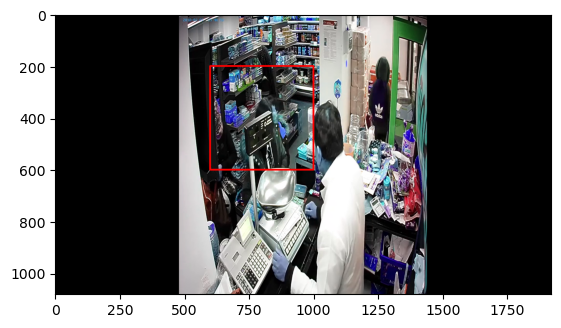

In [53]:
path="/kaggle/input/sample-video-2/Sample_vid_2.mp4"
video=cv2.VideoCapture(path)
xmin,ymin,xmax,ymax=ROI
_,frame_new=video.read()
cv2.rectangle(frame_new,(xmin,ymin),(xmax,ymax),(255,0,0),5)
plt.imshow(frame_new)

In [54]:
show_properties(path)


CV_CAP_PROP_FRAME_WIDTH: '1920.0'
CV_CAP_PROP_FRAME_HEIGHT : '1080.0'
CAP_PROP_FPS : '29.97002997002997'
CAP_PROP_POS_MSEC : '0.0'
CAP_PROP_FRAME_COUNT  : '2263.0'
CAP_PROP_BRIGHTNESS : '0.0'
CAP_PROP_CONTRAST : '0.0'
CAP_PROP_SATURATION : '0.0'
CAP_PROP_HUE : '0.0'
CAP_PROP_GAIN  : '0.0'
CAP_PROP_CONVERT_RGB : '1.0'


In [56]:
Detector_N=Detect(path,model,ROI)

In [57]:
Detector_N.detect_people()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


[INFO] - Original Dim:  (1920, 1080)
[INFO] - Verbose during Prediction: False
[INFO] - Scaling change may cause errors in pixels lines 
[INFO] - Dim Scaled:  (960, 540)


100%|██████████| 2263/2263 [00:50<00:00, 45.01it/s]
